<a href="https://colab.research.google.com/github/MarMastro/pet-data-ai-consulting/blob/master/pet_finder_adoption_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [22]:
df = pd.read_csv("/content/train.csv")
display(df.sample(10))

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
11998,1,Brownie The Puppy,2,307,307,2,2,0,0,3,...,1,1,0,41401,201d38c866a578dc0a58e067f3e019c1,0,An adorable female puppy in KL looking for her...,b440a9cf1,5.0,4
11361,1,Schnauzer Found In Ara Damansara,24,195,0,2,6,7,0,1,...,1,1,0,41326,aa66486163b6cbc25ea62a34b11c9b91,0,This miniature schnauzer was found Jan wanderi...,77e679018,4.0,3
13471,2,Silverr,1,299,0,2,1,2,6,2,...,1,1,0,41326,aa66486163b6cbc25ea62a34b11c9b91,0,Silver was rescued by a neighbor when she soug...,681eb7101,12.0,2
5252,1,NaN,8,307,307,3,2,0,0,2,...,1,4,0,41401,031611c7f555cdbdcfc786adfe13d716,0,LOOKING FOR PET LOVERS INTERESTED TO ADOPT A D...,c9d955ac9,1.0,4
1440,1,Faith & Hope (sentul Longkang Pups),1,307,0,3,2,5,7,2,...,1,2,0,41326,4d2400be2e2e78265f5c84345b7a3415,0,"The two "" Longkang "" pups have been rescued !!...",5a7207717,23.0,2
10019,2,Kitten RA16,24,265,0,2,1,2,7,2,...,1,1,0,41401,b770bac0ca797cf1433c48a35d30c4cb,0,Female-2 years+ . with squirrel tail. already ...,e6ae12115,5.0,1
11526,1,Roxanne,4,307,0,2,1,2,0,2,...,1,1,0,41326,a6f0215f9b4f1002051450d9f52ae212,0,"Meet Roxanne – The Cutie Pie. 4 months olds, F...",8a0a8eec0,3.0,4
4180,1,NaN,4,307,0,2,2,0,0,2,...,1,1,0,41326,6144480d3ba7191b4c6cb414377e5312,0,her previous owner abandoned her. So now we ha...,b26f1c630,4.0,4
4031,2,Coco Puff,2,266,0,1,1,2,4,1,...,1,1,0,41401,9b4a05a6ac4ded37d3d06058f27ade5c,0,"Adorably cute, fun loving looking a good home",eb5dc081c,4.0,1
2302,2,Michi,3,266,285,1,1,6,7,3,...,1,1,0,41401,45a3bd0da8da7ca51449f1c4067bff34,0,The most active amongst his siblings,ea6d8cb1d,1.0,1


## 1. Inspección rápida

In [5]:
# Tipos de datos y nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [6]:
# Estadísticas básicas de variables numéricas
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [17]:
# Corregir max en la columna Age por mostrar 255 como edad

# Cuenta cuántos tienen Age = 255
num_255 = (df['Age'] == 255).sum()
print(f"Registros con Age=255: {num_255}")

Registros con Age=255: 2


In [18]:
import numpy as np

# Paso A: convierte 255 en NaN
df.loc[df['Age'] == 255, 'Age'] = np.nan

# Paso B: imputación (por ejemplo, con la mediana)
mediana_age = df['Age'].median()
df['Age'] = df['Age'].fillna(mediana_age)

print("Valores faltantes en Age tras imputar:", df['Age'].isna().sum())

Valores faltantes en Age tras imputar: 0


In [23]:
# Recortar valores en la columna Age que sean mayores a 25 años

# Recorte de Age a un máximo de 25 años
df['Age'] = df['Age'].apply(lambda x: min(x, 25))


In [24]:
# Verificación
print("Edad máxima tras recorte:", df['Age'].max())

Edad máxima tras recorte: 25


## 2. Detección de valores faltantes

In [36]:
# 1. Rellenar los nombres faltantes
df['Name'] = df['Name'].fillna('NoName')

In [37]:
df['has_name'] = df['Name'] != 'NoName'

In [38]:
print(df['Name'].isna().sum())
print(df['has_name'].value_counts(normalize=True))

0
has_name
True     0.915627
False    0.084373
Name: proportion, dtype: float64


In [19]:
# Cuenta de nulos por columna
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

Description    13
dtype: int64


## 3. Distribuciones clave

### Edad de la mascota

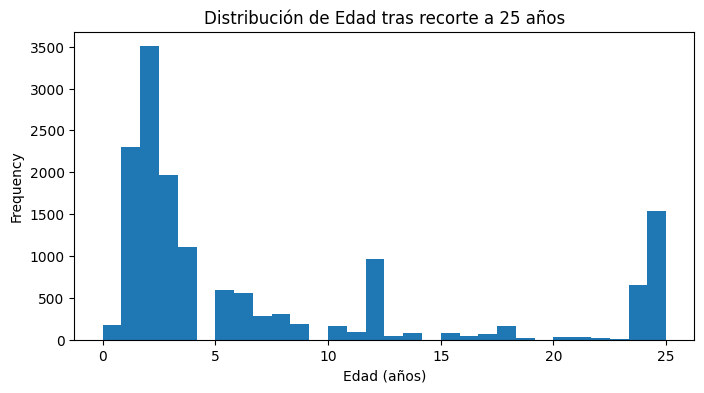

In [28]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df['Age'].plot(kind='hist', bins=30)
plt.title("Distribución de Edad tras recorte a 25 años")
plt.xlabel("Edad (años)")
plt.show()

### Velocidad de adopción

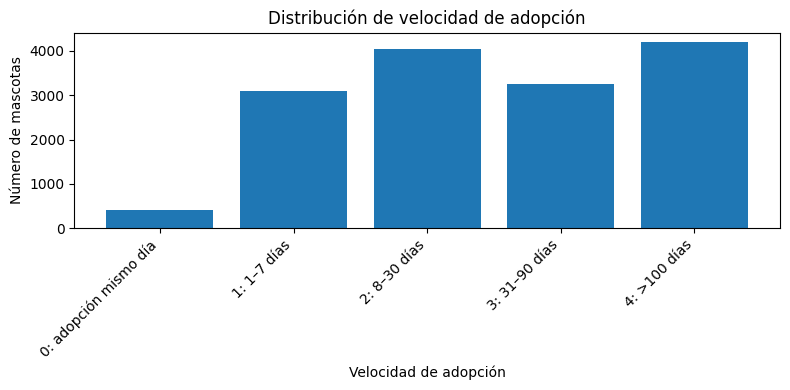

In [32]:
import matplotlib.pyplot as plt

# Cuenta y ordena las clases
counts = df['AdoptionSpeed'].value_counts().sort_index()

# Mapea cada código a su descripción
labels = [
    "0: adopción mismo día",
    "1: 1–7 días",
    "2: 8–30 días",
    "3: 31–90 días",
    "4: >100 días"
]

plt.figure(figsize=(8,4))
plt.bar(counts.index, counts.values)

# Ajusta etiquetas del eje X
plt.xticks(counts.index, labels, rotation=45, ha='right')

# Etiquetas de los ejes
plt.xlabel("Velocidad de adopción")
plt.ylabel("Número de mascotas")

plt.title("Distribución de velocidad de adopción")
plt.tight_layout()
plt.show()

### Número de fotos

<Axes: >

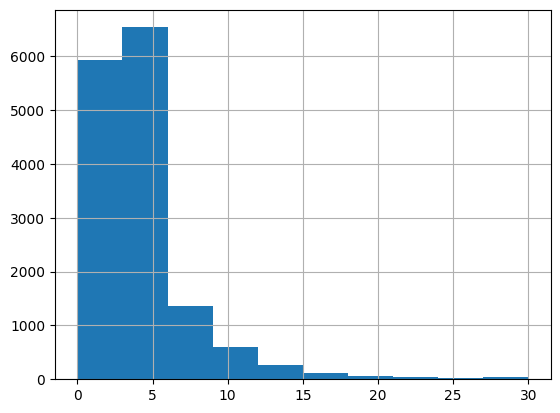

In [10]:
df['PhotoAmt'].hist()

## 4. Cruces básicos

### Adopción vs Edad

/tmp/ipython-input-34-2388622225.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


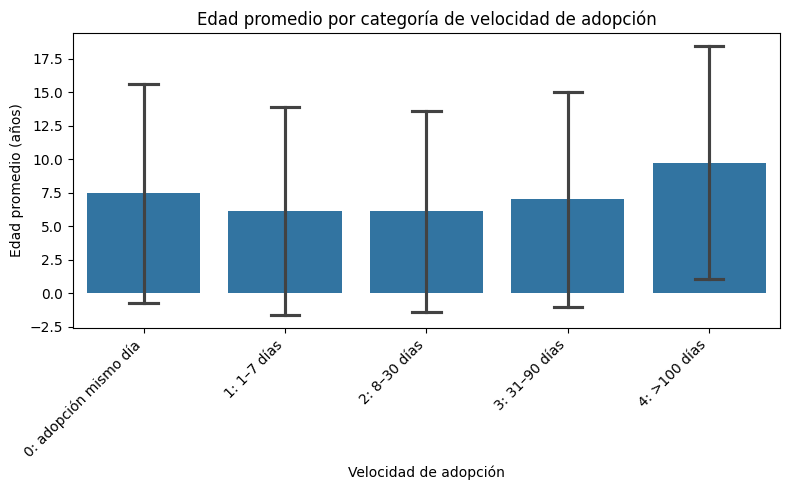

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prepara las etiquetas
labels = [
    "0: adopción mismo día",
    "1: 1–7 días",
    "2: 8–30 días",
    "3: 31–90 días",
    "4: >100 días"
]

plt.figure(figsize=(8,5))
sns.barplot(
    x='AdoptionSpeed',
    y='Age',
    data=df,
    estimator=np.mean,    # calcula la media de Age
    ci='sd',              # muestra ±1 desviación estándar
    capsize=.2            # ancho de las líneas de error
)

# Ajustes de ejes
plt.xticks(ticks=[0,1,2,3,4], labels=labels, rotation=45, ha='right')
plt.xlabel("Velocidad de adopción")
plt.ylabel("Edad promedio (años)")
plt.title("Edad promedio por categoría de velocidad de adopción")
plt.tight_layout()
plt.show()


### Adopción según presencia de descripción

In [35]:
df['has_description'] = df['Description'].notna()
df.groupby('has_description')['AdoptionSpeed'].value_counts(normalize=True).unstack()

AdoptionSpeed,0,1,2,3,4
has_description,,,,,
False,NaN,0.153846,0.384615,0.076923,0.384615
True,0.02737,0.206142,0.269159,0.217490,0.279840


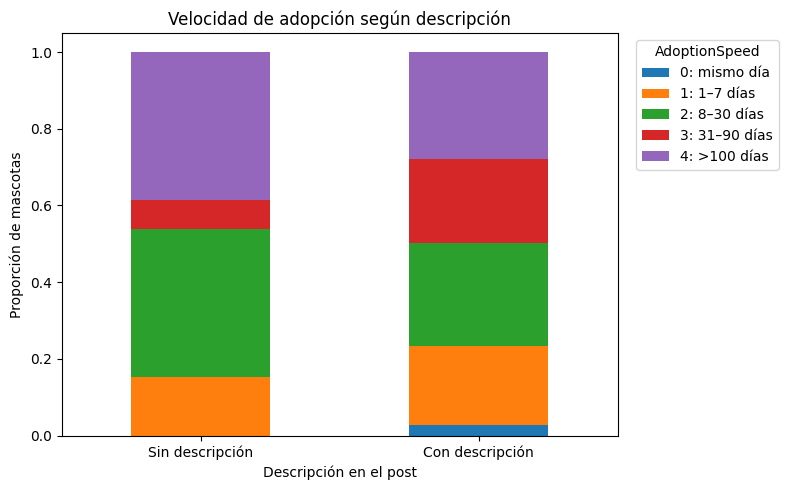

In [41]:
import matplotlib.pyplot as plt

# 1. Calcula las proporciones normalizadas
prop = df.groupby('has_description')['AdoptionSpeed'] \
         .value_counts(normalize=True) \
         .unstack()

# 2. Dibuja el bar plot apilado
ax = prop.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

# 3. Ajusta etiquetas
ax.set_xticklabels(['Sin descripción', 'Con descripción'], rotation=0)
ax.set_xlabel('Descripción en el post')
ax.set_ylabel('Proporción de mascotas')
ax.set_title('Velocidad de adopción según descripción')

# 4. Leyenda con significado de cada código
ax.legend(
    title='AdoptionSpeed',
    labels=[
        '0: mismo día',
        '1: 1–7 días',
        '2: 8–30 días',
        '3: 31–90 días',
        '4: >100 días'
    ],
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()
